# Histogramas, Binnings y Densidad

Un histograma simple puede ser un excelente primer paso para comprender un conjunto de datos.
Anteriormente, vimos una vista previa de la función de histograma de Matplotlib (ver [Comparaciones, Masks, y Lógica Booleana](02.06-Arrays-y-Masks-Booleanas.ipynb)), que crea un histograma básico en una línea, una vez que se realizan las importaciones normales de la placa de caldera:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

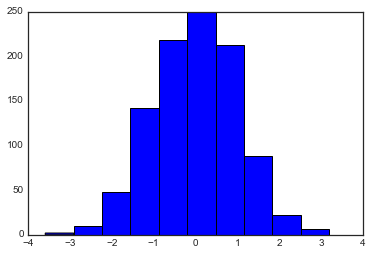

In [ ]:
plt.hist(data);

La función ``hist()`` tiene muchas opciones para ajustar tanto el cálculo como la visualización;
aquí hay un ejemplo de un histograma más personalizado:

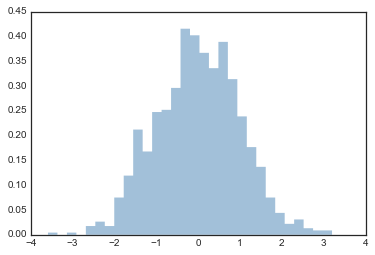

In [ ]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

La cadena de documentación ``plt.hist`` tiene más información sobre otras opciones de personalización disponibles.
Encuentro que esta combinación de ``histtype='stepfilled'`` junto con algo de transparencia ``alpha`` es muy útil cuando se comparan histogramas de varias distribuciones:

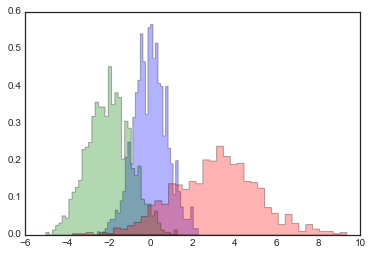

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Si desea simplemente calcular el histograma (es decir, contar el número de puntos en un contenedor determinado) y no mostrarlo, la función ``np.histogram()`` está disponible:

In [ ]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 12 190 468 301  29]


## Histogramas bidimensionales y binnings
Así como creamos histogramas en una dimensión dividiendo la recta numérica en bins, también podemos crear histogramas en dos dimensiones dividiendo puntos entre bins bidimensionales.
Echaremos un breve vistazo a varias formas de hacer esto aquí.
Comenzaremos definiendo algunos datos: una matriz ``x`` e ``y`` extraída de una distribución gaussiana multivariada:

In [ ]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Histograma bidimensional
Una forma sencilla de trazar un histograma bidimensional es usar la función ``plt.hist2d`` de Matplotlib:

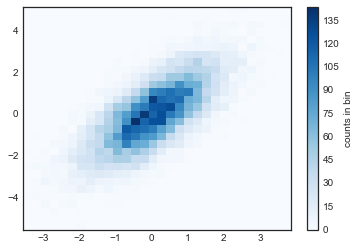

In [ ]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Al igual que con ``plt.hist``, ``plt.hist2d`` tiene una serie de opciones adicionales para afinar la trama y el binning, que están muy bien delineadas en la función docstring.
Además, así como ``plt.hist`` tiene una contraparte en ``np.histogram``, ``plt.hist2d`` tiene una contraparte en ``np.histogram2d``, que se puede usar de la siguiente manera:

In [ ]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

Para la generalización de este agrupamiento de histogramas en dimensiones superiores a dos, consulte la función ``np.histogramdd``.

### ``plt.hexbin``: Agrupaciones hexagonales
El histograma bidimensional crea una teselación de cuadrados a lo largo de los ejes.
Otra forma natural para tal mosaico es el hexágono regular.
Para este propósito, Matplotlib proporciona la rutina ``plt.hexbin``, que representará un conjunto de datos bidimensional agrupado dentro de una cuadrícula de hexágonos:

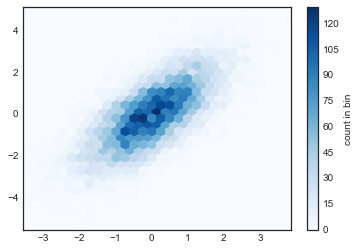

In [ ]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` tiene varias opciones interesantes, incluida la capacidad de especificar pesos para cada punto y cambiar la salida en cada contenedor a cualquier agregado NumPy (media de pesos, desviación estándar de pesos, etc.).

### Estimación de la densidad del kernel
Otro método común para evaluar densidades en múltiples dimensiones es la *estimación de densidad del kernel* (EDK).
Esto se discutirá con más detalle en [En profundidad: Estimación de la densidad del kernel](05.13-Estimación-de-la-densidad-del-kernel.ipynb), pero por ahora simplemente mencionaremos que KDE se puede considerar como una forma de "difuminar" los puntos en el espacio y sumar el resultado para obtener una función fluida.
Existe una implementación de KDE extremadamente rápida y sencilla en el paquete ``scipy.stats``.
Aquí hay un ejemplo rápido del uso de KDE en estos datos:

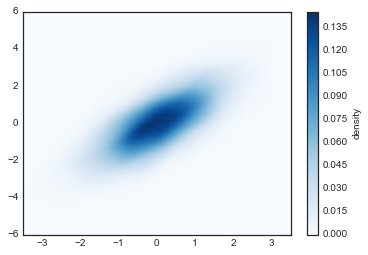

In [ ]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE tiene una longitud de suavizado que efectivamente desliza la perilla entre el detalle y la suavidad (un ejemplo de la omnipresente compensación entre sesgo y varianza).
La literatura sobre la elección de una longitud de suavizado adecuada es amplia: ``gaussian_kde`` utiliza una regla empírica para intentar encontrar una longitud de suavizado casi óptima para los datos de entrada.
Otras implementaciones de KDE están disponibles dentro del ecosistema SciPy, cada una con sus propias fortalezas y debilidades; consulte, por ejemplo, ``sklearn.neighbors.KernelDensity`` y ``statsmodels.nonparametric.kernel_density.KDEMultivariate``.
Para visualizaciones basadas en KDE, el uso de Matplotlib tiende a ser demasiado detallado.
La biblioteca Seaborn, discutida en [Visualización con Seaborn](04.14-Visualización-con-Seaborn.ipynb), proporciona una API mucho más concisa para crear visualizaciones basadas en KDE.